# Load Libraries and Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
train_data = pd.read_excel('data/Data_Train.xlsx')

In [4]:
train_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [5]:
train_data.shape

(10683, 11)

# Data cleaning

In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [9]:
train_data.dropna(inplace=True)

In [10]:
train_data.shape

(10682, 11)

In [11]:
train_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.2 MB


In [12]:
data = train_data.copy()

## Timestamping

### Date

In [13]:
def change_to_datetime(col):
    data[col] = pd.to_datetime(data[col])

In [14]:
from warnings import filterwarnings
filterwarnings('ignore')

In [15]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [16]:
for feature in ['Dep_Time', 'Arrival_Time', 'Date_of_Journey']:
    change_to_datetime(feature)

In [17]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [18]:
data['Journey_month'] = data['Date_of_Journey'].dt.month

In [19]:
data['Journey_day'] = data['Date_of_Journey'].dt.day

In [20]:
data['Journey_year'] = data['Date_of_Journey'].dt.year

### Time

In [21]:
def extract_hour_min(df, col):
    df[col+'_hour'] = df[col].dt.hour
    df[col+'_minute'] = df[col].dt.minute

    return df.head(3)

In [22]:
extract_hour_min(data,'Dep_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-06-16 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,24,2019,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-06-16 05:50:00,2023-06-16 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-06-16 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25


In [23]:
extract_hour_min(data,'Arrival_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-06-16 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,24,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-06-16 05:50:00,2023-06-16 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-06-16 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [24]:
cols_to_drop = ['Arrival_Time','Dep_Time']
data.drop(cols_to_drop, axis=1, inplace=True)
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


### Day/Time

In [25]:
def flight_dep_time(x):

    if (x>4) and (x<=8):
        return 'Early Morning'
    elif (x>8) and (x<=12):
        return 'Morning'
    elif (x>12) and (x<=16):
        return 'Afternoon'
    elif (x>16) and (x<=20):
        return 'Evening'
    elif (x>20) and (x<=24):
        return 'Night'
    else:
        return 'Late Night'

In [26]:
data["Dep_Time_hour"].apply(flight_dep_time).value_counts()

Early Morning    2880
Evening          2357
Morning          2209
Afternoon        1731
Night            1040
Late Night        465
Name: Dep_Time_hour, dtype: int64

<AxesSubplot:>

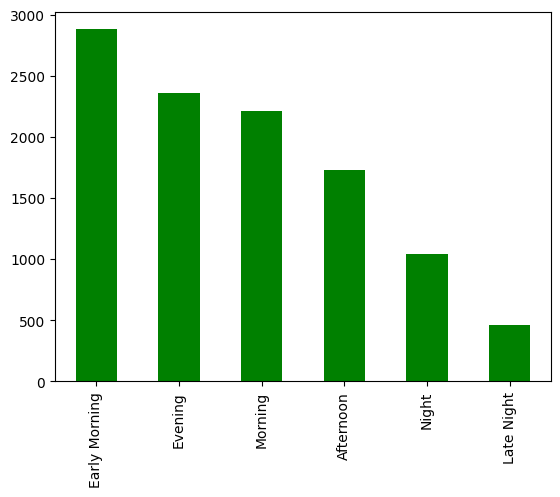

In [27]:
data["Dep_Time_hour"].apply(flight_dep_time).value_counts().plot(kind='bar', color='g')

In [28]:
%pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


In [29]:
%pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [30]:
import plotly
import cufflinks as cf
# from cufflinks.offline import go_offine
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
cf.go_offline()

In [31]:
data["Dep_Time_hour"].apply(flight_dep_time).value_counts().iplot(kind='bar')

# Analysis

## Effect of Flight Duration on Price

### Separating hours and minutes

In [32]:
def preprocess_duration(x):

    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' + '0m'
    
    return x

In [33]:
data['Duration'] = data['Duration'].apply(preprocess_duration)
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25


In [34]:
data['Duration'][0]

'2h 50m'

In [35]:
data['Duration'][0].split(' ')[0]

'2h'

In [36]:
data['Duration'][0].split(' ')[0][0:-1]

'2'

In [37]:
data['Duration'][0].split(' ')[1][0:-1]

'50'

In [38]:
data['Duration_hrs'] = data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))

In [39]:
data['Duration_mins'] = data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))

In [40]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hrs,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,2019,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0


### Turning duration into mins only

In [41]:
data['Duration'].str.replace('h','*60')

0        2*60 50m
1        7*60 25m
2        19*60 0m
3        5*60 25m
4        4*60 45m
           ...   
10678    2*60 30m
10679    2*60 35m
10680     3*60 0m
10681    2*60 40m
10682    8*60 20m
Name: Duration, Length: 10682, dtype: object

In [42]:
data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1')

0        2*60+50*1
1        7*60+25*1
2        19*60+0*1
3        5*60+25*1
4        4*60+45*1
           ...    
10678    2*60+30*1
10679    2*60+35*1
10680     3*60+0*1
10681    2*60+40*1
10682    8*60+20*1
Name: Duration, Length: 10682, dtype: object

In [43]:
data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration, Length: 10682, dtype: int64

In [44]:
data['Duration_total_mins'] = data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

Does duration have an effect on price?

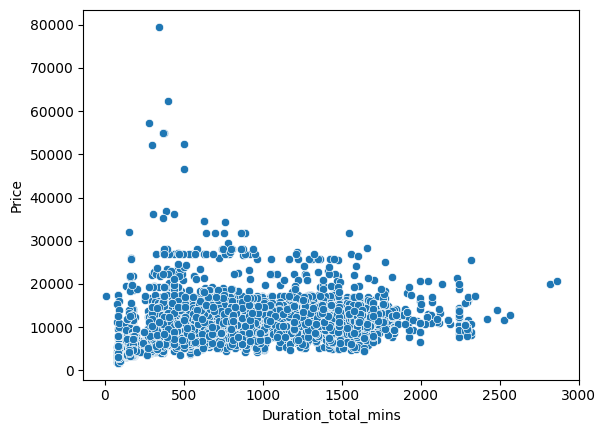

In [45]:
sns.scatterplot(x='Duration_total_mins', y='Price', data=data);

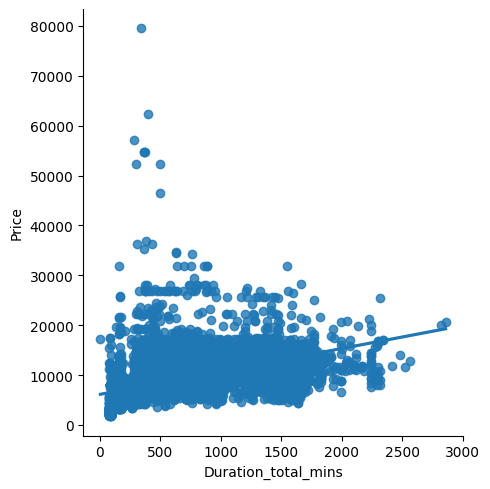

In [46]:
sns.lmplot(x='Duration_total_mins', y='Price', data=data);

Add hue for number of stops

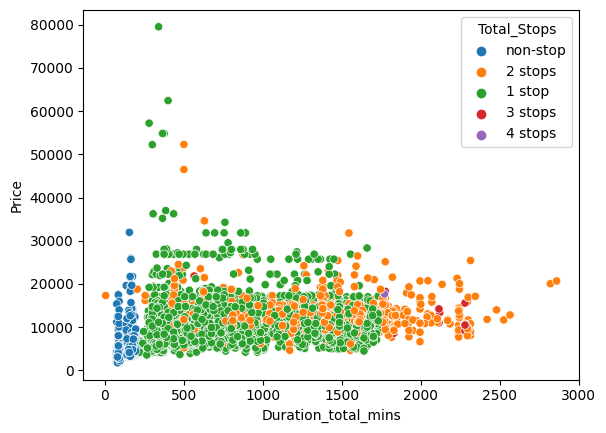

In [47]:
sns.scatterplot(x='Duration_total_mins', y='Price', data=data, hue='Total_Stops');

## Effect of Airline on Price

Jet Airways analysis

In [48]:
data[data['Airline'] == 'Jet Airways']

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hrs,Duration_mins,Duration_total_mins
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0,1140
6,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,3,2019,18,55,10,25,15,30,930
7,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,3,2019,8,0,5,5,21,5,1265
8,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,3,2019,8,55,10,25,25,30,1530
13,Jet Airways,2019-09-05,Kolkata,Banglore,CCU → BOM → BLR,12h 10m,1 stop,In-flight meal not included,9663,9,5,2019,21,10,9,20,12,10,730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10668,Jet Airways,2019-09-05,Delhi,Cochin,DEL → JDH → BOM → COK,7h 20m,2 stops,No info,21219,9,5,2019,11,40,19,0,7,20,440
10672,Jet Airways,2019-06-27,Delhi,Cochin,DEL → AMD → BOM → COK,19h 55m,2 stops,In-flight meal not included,11150,6,27,2019,23,5,19,0,19,55,1195
10673,Jet Airways,2019-05-27,Delhi,Cochin,DEL → AMD → BOM → COK,15h 0m,2 stops,No info,16704,5,27,2019,13,25,4,25,15,0,900
10674,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,24h 45m,1 stop,In-flight meal not included,11087,12,3,2019,20,35,21,20,24,45,1485


In [49]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').count()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hrs,Duration_mins,Duration_total_mins
Route,,,,,,,,,,,,,,,,,,
BLR → BDQ → DEL,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
BLR → BOM → DEL,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385
BLR → BOM → JDH → DEL,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
BLR → DEL,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382
BLR → MAA → DEL,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
BOM → BDQ → DEL → HYD,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
BOM → DED → DEL → HYD,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
BOM → DEL → HYD,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
BOM → HYD,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207


In [50]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

Airline v Price

In [51]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_month',
       'Journey_day', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hrs',
       'Duration_mins', 'Duration_total_mins'],
      dtype='object')

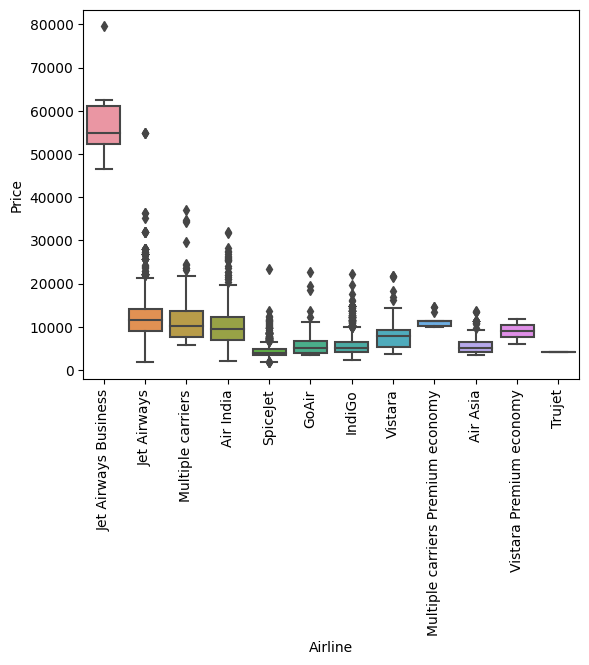

In [52]:
sns.boxplot(x='Airline', y='Price', data=data.sort_values('Price', ascending=False))
plt.xticks(rotation='vertical');

# Feature Encoding

### Source: Doing OneHotEncoder from scratch

In [53]:
cat_col = [col for col in data.columns if data[col].dtype=='object']

In [54]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [55]:
data['Source'].apply(lambda x:1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [56]:
for sub_category in data['Source'].unique():
    data['Source'+sub_category] = data['Source'].apply(lambda x:1 if x==sub_category else 0)

In [57]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_month,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hrs,Duration_mins,Duration_total_mins,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


### Target guided encoding: Airline vs Price

In [58]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

Trujet has lowest price (want to give it 0) with Jet Airways Business having highest value

In [59]:
data.groupby(['Airline'])['Price'].mean().sort_values().index

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [60]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [61]:
{airline: i for i, airline in enumerate(airlines, 0)}

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [62]:
dict_airlines = {airline: i for i, airline in enumerate(airlines, 0)}

In [63]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [64]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_month,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hrs,Duration_mins,Duration_total_mins,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


### Destination encoding

In [65]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

New Delhi and Delhi are the same as there is only 1 airport

In [66]:
data['Destination'].replace('New Delhi','Delhi', inplace=True)

In [67]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [68]:
data.groupby(['Destination'])['Price'].mean().sort_values()

Destination
Kolkata       4789.892388
Hyderabad     5059.708752
Delhi         8017.464269
Banglore      9158.389411
Cochin       10540.113536
Name: Price, dtype: float64

In [69]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [70]:
dict_dest = {dest: i for i, dest in enumerate(dest, 0)}
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [71]:
data['Destination'] = data['Destination'].map(dict_dest)
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_month,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hrs,Duration_mins,Duration_total_mins,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,3,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


### Total_Stop Label encoding

In [72]:
data['Total_Stops'].unique() # Ordinal data

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [73]:
stops = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [74]:
data['Total_Stops']=data['Total_Stops'].map(stops)
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_month,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hrs,Duration_mins,Duration_total_mins,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,3,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


### Other columns? Removal

In [75]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_month',
       'Journey_day', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hrs',
       'Duration_mins', 'Duration_total_mins', 'SourceBanglore',
       'SourceKolkata', 'SourceDelhi', 'SourceChennai', 'SourceMumbai'],
      dtype='object')

In [76]:
data['Additional_Info'].value_counts()/len(data)

No info                         0.781127
In-flight meal not included     0.185546
No check-in baggage included    0.029957
1 Long layover                  0.001779
Change airports                 0.000655
Business class                  0.000374
No Info                         0.000281
1 Short layover                 0.000094
Red-eye flight                  0.000094
2 Long layover                  0.000094
Name: Additional_Info, dtype: float64

In [77]:
data.Journey_year.unique()

array([2019])

In [78]:
# most Additional Info = 'No info'
# Journey_year = 2019
data.drop(columns=['Date_of_Journey','Additional_Info','Source','Duration_total_mins','Journey_year',],
          axis=1, inplace=True)

In [79]:
data.drop(columns=['Route'],
          axis=1, inplace=True)

In [80]:
data.drop(columns=['Duration'],
          axis=1, inplace=True)

In [81]:
data.head(2)

,Airline,Destination,Total_Stops,Price,Journey_month,Journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hrs,Duration_mins,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,2,0,3897,3,24,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0


## Outliers

In [82]:
def plot_fig(df,col):

    fig,(ax1,ax2,ax3) = plt.subplots(3,1)

    sns.distplot(df[col], ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.histplot(df[col],ax=ax3,kde=False)

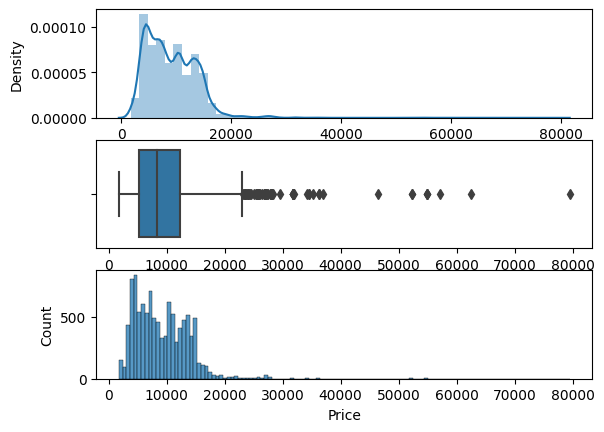

In [83]:
plot_fig(data,'Price')

In [84]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3-q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [85]:
print(f'max = {maximum}, min = {minimum}')

max = 23017.0, min = -5367.0


In [86]:
print([price for price in data['Price'] if price > maximum or price < minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [87]:
len([price for price in data['Price'] if price > maximum or price < minimum])

94

In [88]:
data['Price'] = np.where(data['Price']>=35000, data['Price'].median(), data['Price'])

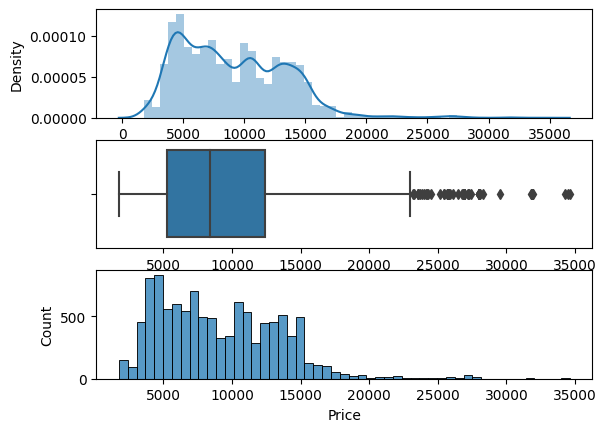

In [89]:
plot_fig(data,'Price')

# Feature Selection

In [90]:
from sklearn.feature_selection import mutual_info_regression

In [91]:
X = data.drop(['Price'], axis=1)

In [92]:
y = data['Price']

In [93]:
imp = mutual_info_regression(X,y)

In [94]:
imp_df = pd.DataFrame(imp, index=X.columns)
imp_df.columns = ['Importance']
imp_df

,Importance
Airline,0.975323
Destination,0.998680
Total_Stops,0.794130
Journey_month,0.235867
Journey_day,0.208876
Dep_Time_hour,0.335447
Dep_Time_minute,0.258006
Arrival_Time_hour,0.403799
Arrival_Time_minute,0.349518
Duration_hrs,0.464350


In [95]:
imp_df.sort_values(by='Importance', ascending=False)

,Importance
Destination,0.998680
Airline,0.975323
Total_Stops,0.794130
SourceDelhi,0.517628
Duration_hrs,0.464350
SourceKolkata,0.454721
Arrival_Time_hour,0.403799
SourceBanglore,0.387065
Arrival_Time_minute,0.349518
Duration_mins,0.343746


# Modeling

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Random Forest

In [98]:
from sklearn.ensemble import RandomForestRegressor

In [99]:
ml_model = RandomForestRegressor()

In [100]:
ml_model.fit(X_train,y_train)

RandomForestRegressor()

In [101]:
y_pred = ml_model.predict(X_test)

In [102]:
y_pred

array([16759.15,  6338.64,  8867.  , ...,  3575.28,  6219.07,  7010.38])

In [103]:
from sklearn import metrics

In [104]:
metrics.r2_score(y_test,y_pred)

0.8071938518664548

In [105]:
import pickle

In [106]:
import os
os.getcwd()

'/home/mai/code/maik137/project-airline_tickets_ML'

In [107]:
file = open(r'/home/mai/code/maik137/project-airline_tickets_ML/rf_random.pkl', 'wb')

In [108]:
pickle.dump(ml_model,file)

In [109]:
model = open(r'/home/mai/code/maik137/project-airline_tickets_ML/rf_random.pkl', 'rb')

In [110]:
forest = pickle.load(model)

In [111]:
y_pred2 = forest.predict(X_test)

In [112]:
metrics.r2_score(y_test,y_pred2)

0.8071938518664548

## Evaluation Metric

Mean Absolute Percentage Error

In [113]:
def mape(y_true, y_pred):

    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    return np.mean(np.abs((y_true - y_pred) /y_true)) * 100

In [114]:
mape(y_test,y_pred)

13.236117681161497

## Pipeline

In [115]:
def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    print(f'Training score: {model.score(X_train, y_train)}')

    y_prediction = model.predict(X_test)
    print(f'Predictions are: {y_prediction}\n')
    
    r2_score = metrics.r2_score(y_test, y_prediction)
    print(f'r2 score: {r2_score}')
    print(f'MAE: {metrics.mean_absolute_error(y_test, y_prediction)}')
    print(f'MSE: {metrics.mean_squared_error(y_test, y_prediction)}')
    print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_prediction))}')
    print(f'MAPE: {mape(y_test, y_prediction)}')
    sns.displot(y_test-y_prediction)

Training score: 0.9515018002115795
Predictions are: [16676.91  6068.79  8939.79 ...  3540.68  6322.27  7004.53]

r2 score: 0.807941975853291
MAE: 1183.012222431329
MSE: 3738908.726621647
RMSE: 1933.6257979820311
MAPE: 13.239293175664043


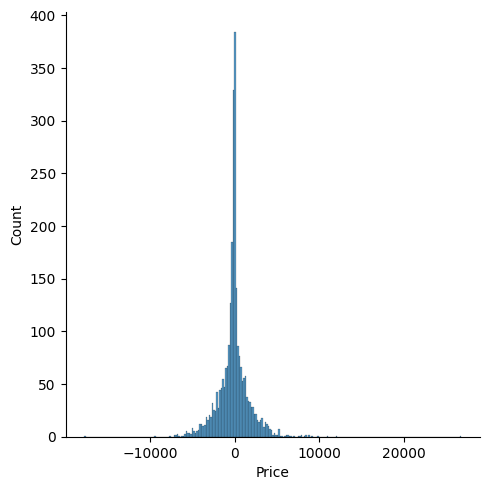

In [116]:
predict(RandomForestRegressor())

In [117]:
from sklearn.tree import DecisionTreeRegressor

Training score: 0.966591628243878
Predictions are: [16840.  6976.  8610. ...  3419.  5797.  6818.]

r2 score: 0.6907092187415249
MAE: 1375.832522151504
MSE: 6021149.109748118
RMSE: 2453.8029891880315
MAPE: 15.133517769367957


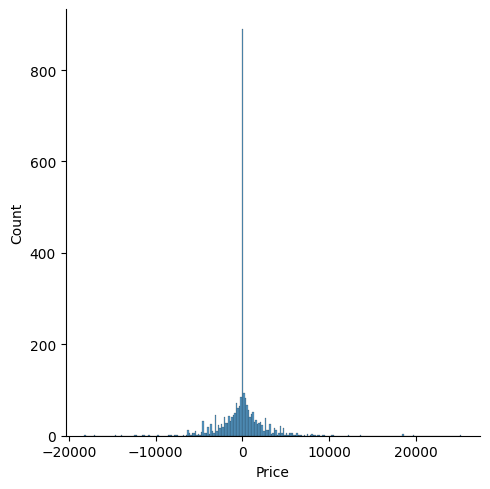

In [118]:
predict(DecisionTreeRegressor())

# Model Tuning

In [119]:
from sklearn.model_selection import RandomizedSearchCV

In [120]:
reg_rf = RandomForestRegressor()

In [121]:
np.linspace(start = 100, stop=1200, num=6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [122]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop=1200, num=6)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 5, stop=30, num=4)]
min_samples_split = [5,10,15,100]

In [123]:
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split
}

In [124]:
rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid, cv=3, n_jobs=-1, verbose=2)

In [125]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/home/mai/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mai/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mai/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly s

[CV] END max_depth=30, max_features=auto, min_samples_split=100, n_estimators=760; total time=  18.3s


/home/mai/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_split=100, n_estimators=760; total time=  18.2s


/home/mai/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_split=100, n_estimators=760; total time=  23.0s


/home/mai/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=auto, min_samples_split=100, n_estimators=980; total time=  30.4s


/home/mai/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=auto, min_samples_split=100, n_estimators=1200; total time=  31.7s


/home/mai/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=auto, min_samples_split=100, n_estimators=980; total time=  32.3s


/home/mai/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=auto, min_samples_split=100, n_estimators=1200; total time=  34.5s


/home/mai/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=13, max_features=auto, min_samples_split=100, n_estimators=100; total time=   3.7s


/home/mai/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=13, max_features=auto, min_samples_split=100, n_estimators=100; total time=   3.3s
[CV] END max_depth=21, max_features=auto, min_samples_split=100, n_estimators=1200; total time=  36.7s


/home/mai/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/mai/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=13, max_features=auto, min_samples_split=100, n_estimators=100; total time=   3.4s
[CV] END max_depth=13, max_features=auto, min_samples_split=5, n_estimators=540; total time=  22.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=15, n_estimators=540; total time=   7.9s
[CV] END max_depth=13, max_features=auto, min_samples_split=5, n_estimators=540; total time=  24.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=15, n_estimators=540; total time=   5.8s
[CV] END max_depth=21, max_features=auto, min_samples_split=100, n_estimators=980; total time=  31.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=15, n_estimators=540; total time=   6.3s


/home/mai/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=13, max_features=auto, min_samples_split=5, n_estimators=540; total time=  25.4s


/home/mai/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=980; total time=  17.3s


/home/mai/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=980; total time=  17.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=980; total time=  22.3s
[CV] END max_depth=21, max_features=auto, min_samples_split=15, n_estimators=980; total time=  35.4s
[CV] END max_depth=21, max_features=auto, min_samples_split=15, n_estimators=980; total time=  37.6s
[CV] END max_depth=13, max_features=auto, min_samples_split=10, n_estimators=540; total time=  22.2s
[CV] END max_depth=21, max_features=auto, min_samples_split=15, n_estimators=980; total time=  40.4s
[CV] END max_depth=13, max_features=auto, min_samples_split=10, n_estimators=540; total time=  21.6s
[CV] END max_depth=13, max_features=auto, min_samples_split=10, n_estimators=540; total time=  16.0s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=5, n_estimators=1200; total time=  17.4s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=5, n_estimators=1200; total time=

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [126]:
rf_random.best_params_

{'n_estimators': 540,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 13}

In [127]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=13, max_features='auto', min_samples_split=5,
                      n_estimators=540)

In [128]:
rf_random.best_score_

0.8221123577249431